## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

/tmp/ipykernel_44157/2650004690.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [3]:
dataset = pd.read_csv('titanic.csv')

print(dataset.describe())

print(dataset.shape)

print(dataset.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [4]:
missing_values = dataset.isnull().sum()

print("Missing values: ", missing_values)

Missing values:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

За результатами обчислень кількість пропущених значень у атрибутах:
Age: Є 177 пропущених значень.
Cabin: Є 687 пропущених значень.
Embarked: Є 2 пропущених значення.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



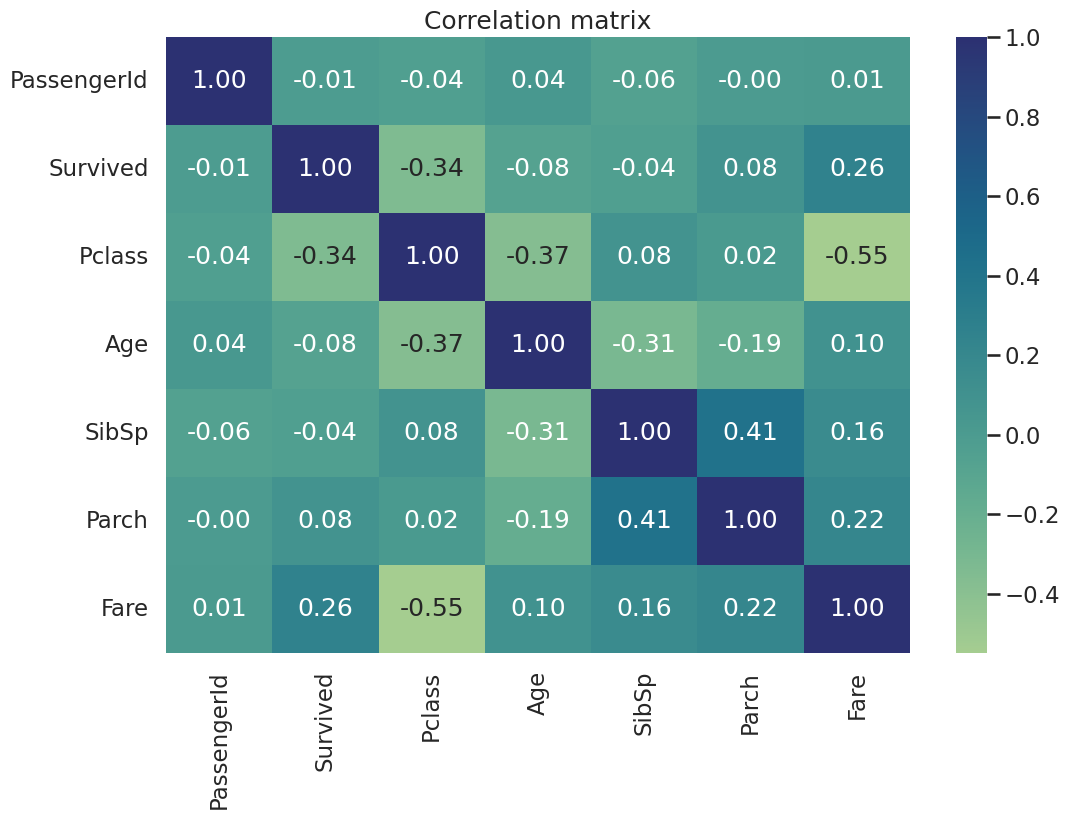

In [6]:
numeric_df = dataset.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f")
plt.title('Correlation matrix')
plt.show()

Ваші висновки:

Survived: Позитивна кореляція з Fare (0.26), негативна з Pclass (-0.34).
Pclass: Негативна кореляція з Fare (-0.55) і Survived (-0.34).
Age: Слабка позитивна з Parch (0.19) і слабка негативна з Pclass (-0.37).
SibSp та Parch: Слабка кореляція (0.41) між собою.
Fare: Позитивна з Survived (0.26) і негативна з Pclass (-0.55).

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [7]:
def fill_missing_values(dataset, column_name, group_by_columns):
    dataset[column_name] = dataset.groupby(group_by_columns)[column_name].transform(lambda x: x.fillna(x.median()))
    return dataset

dataset_filled = fill_missing_values(dataset, 'Age', ['Sex'])
print(dataset_filled.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки: 

Ми успішно заповнили пропущені значення у колонці "Age" за групами по колонці "Sex".Це дозволить уникнути проблем з моделюванням та аналізом даних, пов'язаних з пропущеними значеннями.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





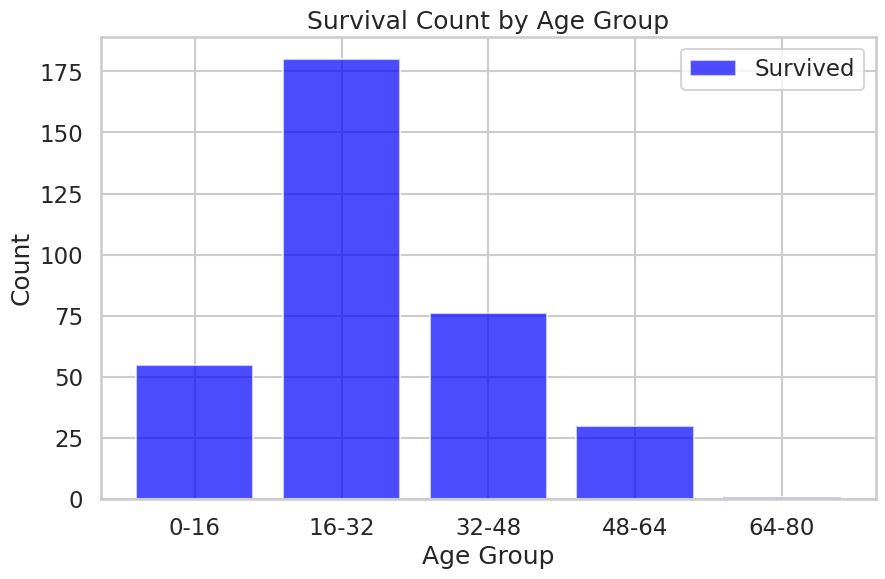

In [10]:
dataset['Age_bin'] = pd.cut(dataset['Age'], bins=5, labels=False)

survived_age = dataset[dataset['Survived'] == 1]['Age_bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(survived_age.index, survived_age.values, color='blue', alpha=0.7, label='Survived')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Count by Age Group')
plt.xticks(range(5), ['0-16', '16-32', '32-48', '48-64', '64-80'])
plt.legend()
plt.show()

Ваші висновки:

Вік від 0 до 16 років: Ця група мала малий рівень виживання.
Вік від 16 до 32 років: Ця група мала високий рівень виживання.
Вік від 32 до 48 років: Ця група також мала середній рівень виживання.
Вік від 48 до 64 років: Ця група мала низький рівень виживання серед усіх вікових категорій.
Вік від 64 до 80 років: У цій групі майже всі загинули.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [11]:
dataset['Fare_quartile'] = pd.qcut(dataset['Fare'], 4, labels=False)

survived_by_quartile = dataset.groupby('Fare_quartile')['Survived'].mean()

print(survived_by_quartile)

Fare_quartile
0    0.197309
1    0.303571
2    0.454955
3    0.581081
Name: Survived, dtype: float64


Ваші висновки:

Виживання пасажирів на Титаніку корелює з вартістю квитка (fare): чим вища ціна, тим більше шансів на виживання

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [8]:
dataset['Family_size'] = dataset['Parch'] + dataset['SibSp']
dataset['Alone'] = (dataset['Family_size'] == 0).astype(int)

family_size_survived = dataset.groupby('Family_size')['Survived'].mean()
alone_survived = dataset.groupby('Alone')['Survived'].mean()

print("Survival rate by family size:", family_size_survived)
print("Survival rate if alone or not:", alone_survived)

Survival rate by family size: Family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64
Survival rate if alone or not: Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


Ваші висновки:

Пасажири з родиною мали вищий середній рівень виживання, особливо ті, у кого було 3-4 члени сім'ї на борту.
Пасажири, які були одинокі (без родини), мали нижчий середній рівень виживання.

Пасажири, які подорожували без сім'ї, мали нижчий середній рівень виживання порівняно з тими, у кого була родина на борту

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [14]:
missing_values = dataset.isnull().mean() * 100

columns_to_drop = missing_values[missing_values > 50].index.tolist()
columns_to_drop += ['PassengerId', 'Name', 'Ticket', 'Cabin']

df_cleaned = dataset.drop(columns=columns_to_drop)

print(df_cleaned.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Age_bin  \
0         0       3    male  22.0      1      0   7.2500        S        1   
1         1       1  female  38.0      1      0  71.2833        C        2   
2         1       3  female  26.0      0      0   7.9250        S        1   
3         1       1  female  35.0      1      0  53.1000        S        2   
4         0       3    male  35.0      0      0   8.0500        S        2   

   Fare_quartile  Family_size  Alone  
0              0            1      0  
1              3            1      0  
2              1            0      1  
3              3            1      0  
4              1            0      1  


Ваші висновки:

Cabin (понад 50% пропущених значень).
PassengerId, Name, Ticket (нерелевантні для аналізу).
Embarked (невелика кількість пропущених значень).

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [9]:
dataset['Sex'] = dataset['Sex'].replace({'male': 0, 'female': 1})

dataset['Embarked'] = dataset['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3}
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).map(title_mapping)

print(dataset[['Sex', 'Embarked', 'Title']])

     Sex  Embarked  Title
0      0       0.0    0.0
1      1       1.0    2.0
2      1       0.0    1.0
3      1       0.0    2.0
4      0       0.0    0.0
..   ...       ...    ...
886    0       0.0    NaN
887    1       0.0    1.0
888    1       0.0    1.0
889    0       1.0    0.0
890    0       2.0    0.0

[891 rows x 3 columns]


/tmp/ipykernel_44157/3448730077.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Sex'] = dataset['Sex'].replace({'male': 0, 'female': 1})
/tmp/ipykernel_44157/3448730077.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Embarked'] = dataset['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


Ваші висновки:


Код виконує перетворення змінних Sex, Embarked та Title з текстових значень на числові для подальшого використання в аналізі даних. Змінна Sex перетворюється на два числових значення: 0 для чоловіків і 1 для жінок. Embarked перетворюється на три числові значення: 0 для S (Southampton), 1 для C (Cherbourg) і 2 для Q (Queenstown). Title витягується зі стовпця Name за допомогою регулярного виразу із зазначенням префіксу перед крапкою. Отримані значення Title замінюються на числові відповідно до визначеного словника.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



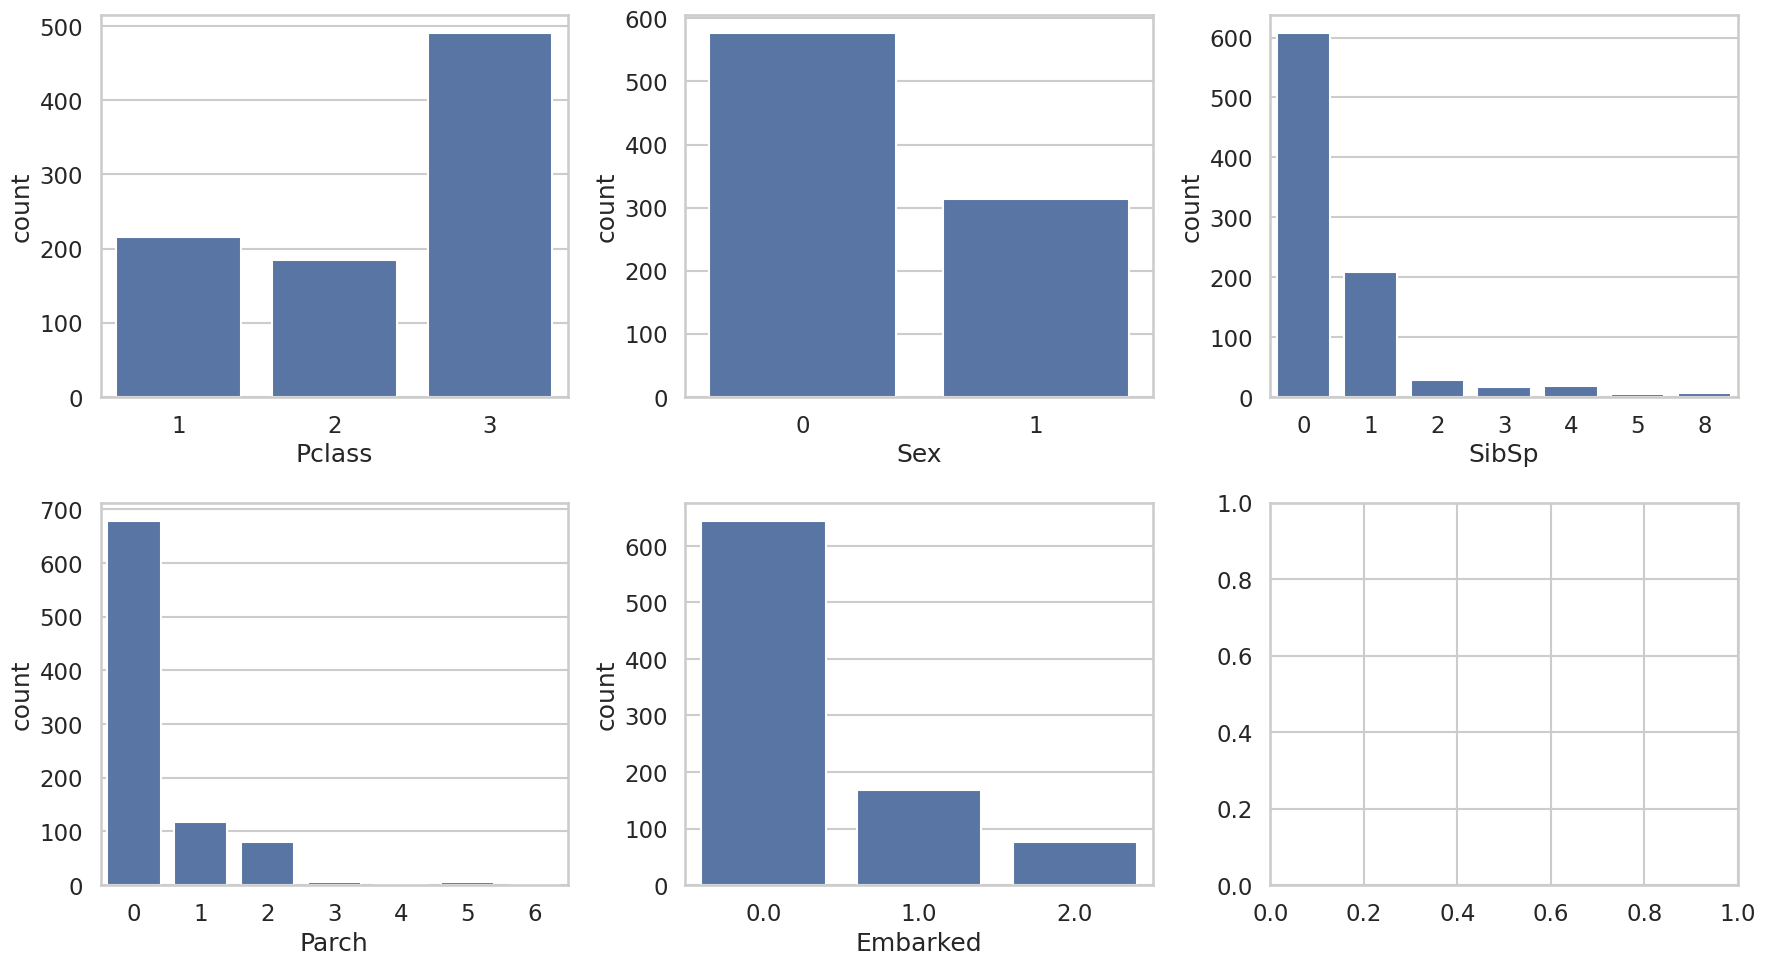

In [11]:
categorical_variables = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, var in enumerate(categorical_variables):
    sns.countplot(x=var, data=dataset, ax=axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

Ваші висновки:

Графіки категоріальних змінних демонструють розподіл даних у різних категоріях. Більшість пасажирів були третього класу, більшість з них - чоловіки. Більшість пасажирів подорожували без братів, сестер, дітей або батьків на борту. Найбільша кількість пасажирів посадилася в порту Southampton.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

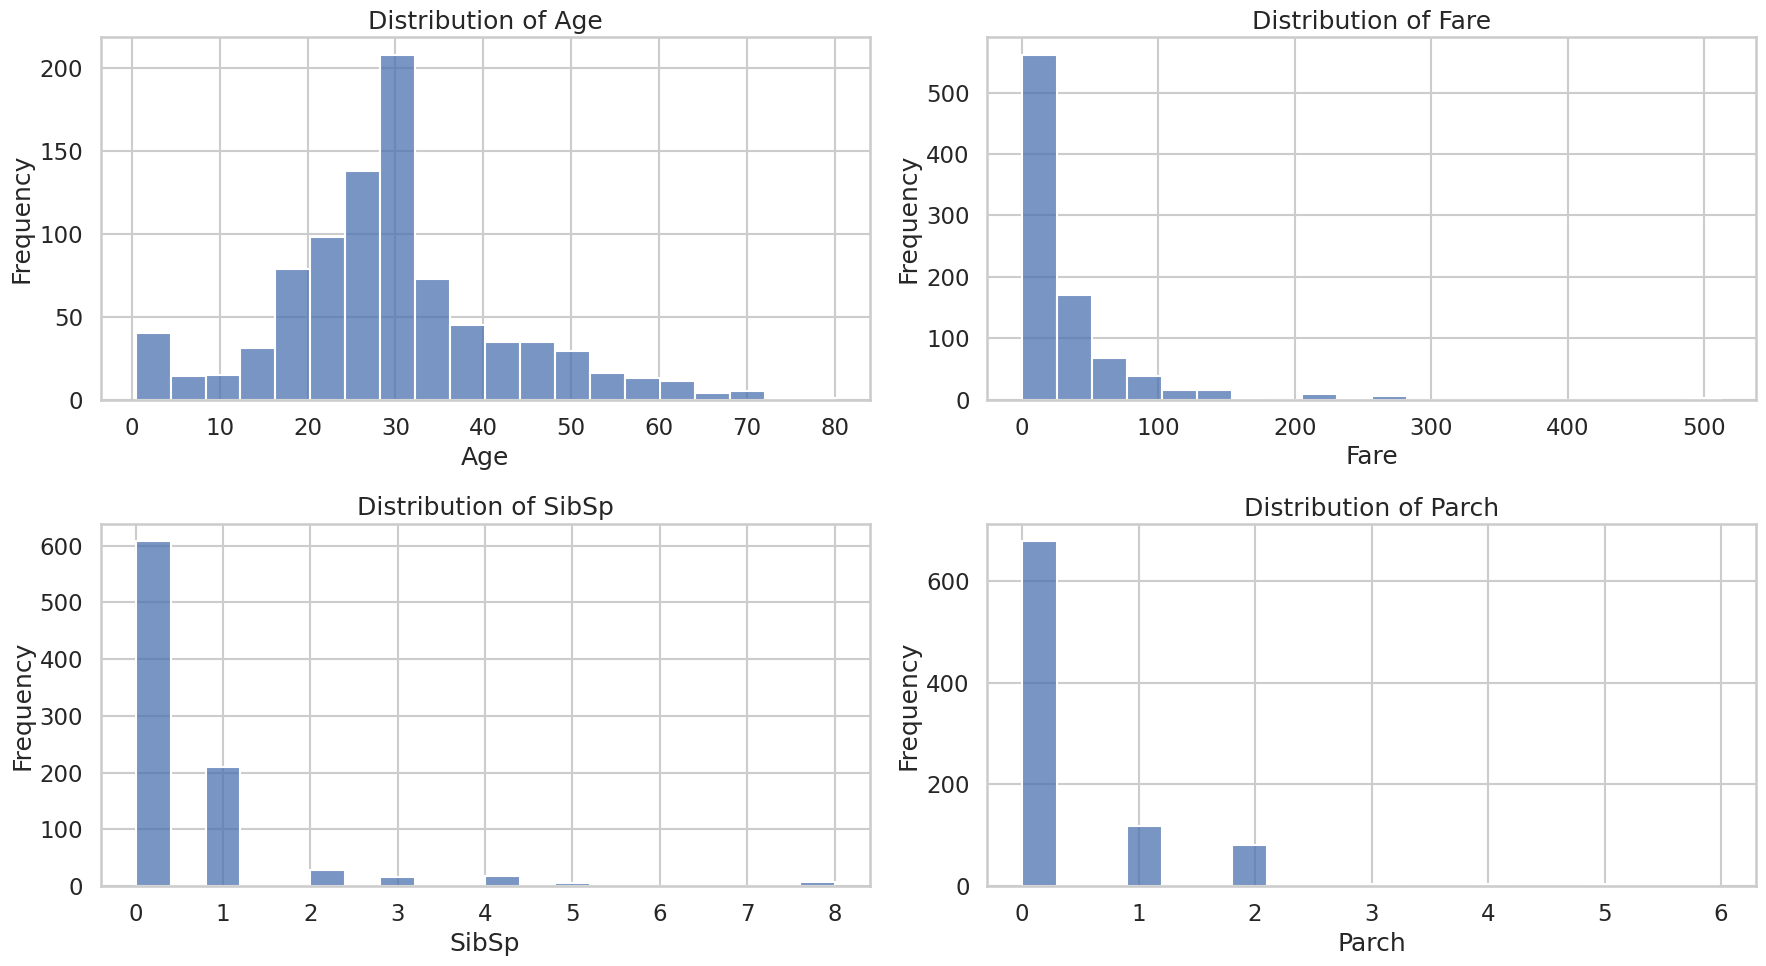

In [29]:
numeric_vars = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
for i, var in enumerate(numeric_vars):
    sns.histplot(dataset[var], bins=20, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {var}')
    axes[i // 2, i % 2].set_xlabel(var)
    axes[i // 2, i % 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Ваші висновки:

Діаграми розподілу числових змінних показують, як розподілені дані в кожній змінній. Гістограма віку (Age) показує, що більшість пасажирів були молодші за 40 років. Гістограма вартості квитка (Fare) показує, що більшість квитків були дешевшими, але є декілька високих значень, що свідчить про наявність дорогих квитків. Розподіл кількості братів/сестер/чоловіків/дружин на борту (SibSp) та кількості батьків/дітей на борту (Parch) показує, що більшість пасажирів подорожували без таких родичів.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

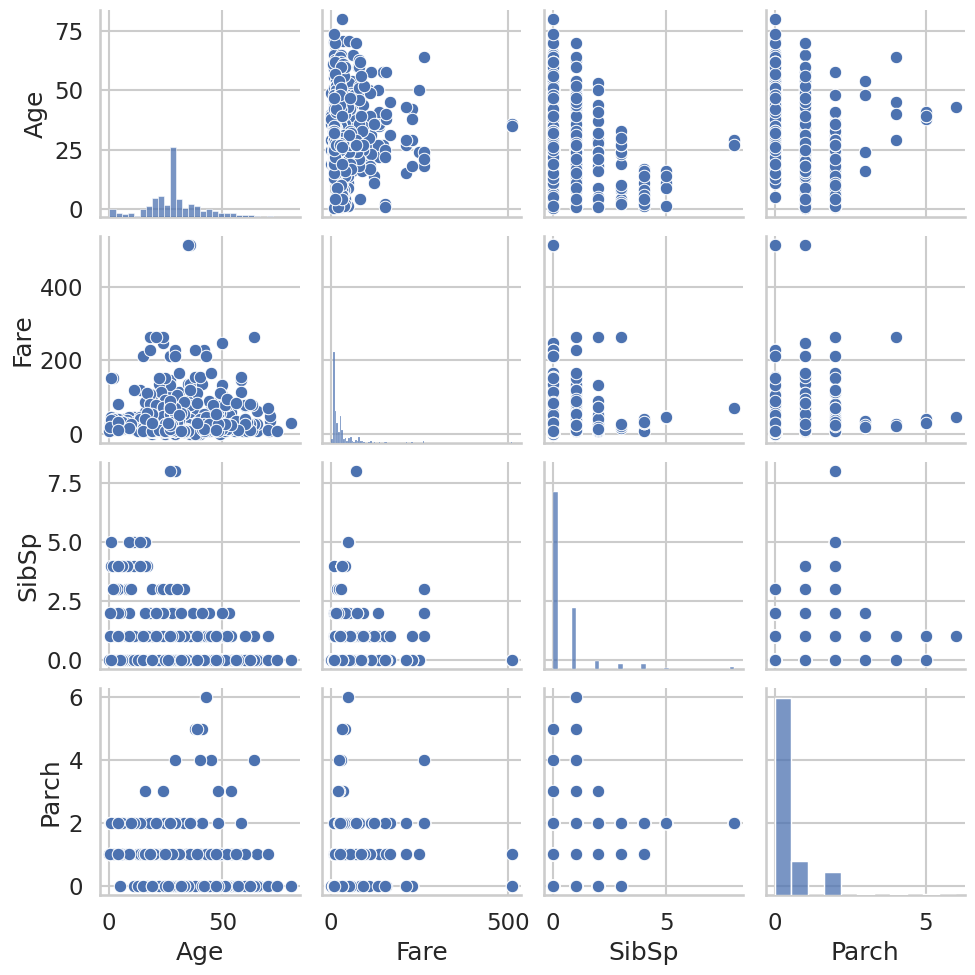

In [12]:
numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

sns.pairplot(dataset[numeric_variables], diag_kind='hist')
plt.show()

Ваші висновки:

На графіках співвідношення між числовими змінними було показано, що вік пасажирів мав слабку кореляцію з вартістю квитка та кількістю братів, сестер, чоловіків або дружин на борту. Кількість батьків або дітей на борту також не сильно залежала від віку пасажирів.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.